In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import sys
#"".."からimportできなかったため，パスを追加．
module_path = os.path.abspath(os.path.join('../analysis'))
if module_path not in sys.path:
    sys.path.append(module_path)

import analysis_black_jack as abj
import make_dataframe as md

# basic_strategyの最適化

In [3]:
%%time
b = abj.MakeBasicStrategy(GAME_TIME=5000, generations=7)
new_bs = b.main()
print(new_bs)
new_bs.to_csv("../csv/basic_strategy_new")

[1000, 2500, 5000, 5000, 5000, 10000, 20000]


100%|████████████████████████████████████████████████████████████████████████████████| 7/7 [2:20:02<00:00, 1200.36s/it]


[55, 31, 13, 30, 16, 12, 27]
      2  3  4  5  6  7  8  9 10  1
PC                                
:8    H  H  H  H  H  H  H  H  H  S
9     D  D  D  D  D  H  H  H  H  S
10    D  D  D  D  D  D  D  D  H  D
11    D  D  D  D  D  D  D  D  D  D
12    H  S  S  S  S  H  H  H  H  S
13    S  S  S  S  S  H  H  H  H  S
14    S  S  S  S  S  H  H  H  H  S
15    S  S  S  S  S  H  H  H  H  S
16    S  S  S  S  S  H  H  H  H  S
17:   S  S  S  S  S  S  S  S  S  S
A2    H  H  D  D  D  H  H  H  H  H
A3    H  H  D  D  D  H  H  H  H  H
A4    H  H  H  D  D  H  H  H  H  H
A5    H  H  D  D  D  H  H  H  H  H
A6    H  D  D  D  D  H  H  H  H  S
A7    S  S  D  D  D  S  S  H  H  S
A8    S  S  S  S  S  S  S  S  S  S
A9    S  S  S  S  S  S  S  S  S  S
A10   S  S  S  S  S  S  S  S  S  S
22    P  P  P  P  P  P  H  H  H  S
33    P  P  P  P  P  P  H  H  H  S
44    H  H  H  P  P  H  H  H  H  S
55    D  D  D  D  D  D  D  D  H  D
66    P  P  P  P  P  P  H  H  H  S
77    P  P  P  P  P  P  P  H  H  S
88    P  P  P  P  P  P  P 

# basic_strategy_new.csvの勝率推移

In [4]:
%%time
a = md.MakeDataFrame(10000000, 6, False, basic_strategy_num="_new")
df = a.main()

100%|████████████████████████████████████████████████████████████████████████████████| 10000000/10000000 [31:17<00:00, 5326.22it/s]


DataFrameを作成
Wall time: 32min 41s


49.4908%


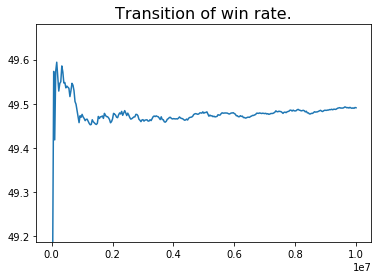

Wall time: 18min 49s


In [5]:
%%time
b = abj.WinPercentage(df)
j, k = b.win_percentage(split=300, plot=True)

# basic_strategy.csvの勝率推移

In [6]:
%%time
a = md.MakeDataFrame(10000000, 6, False)
df2 = a.main()

100%|████████████████████████████████████████████████████████████████████████████████| 10000000/10000000 [16:47<00:00, 9926.39it/s]


DataFrameを作成
Wall time: 18min 4s


49.58196%


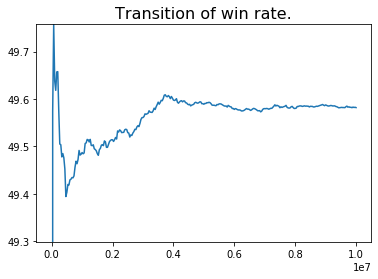

Wall time: 8min 33s


In [7]:
%%time
b = abj.WinPercentage(df2)
j2, k2 = b.win_percentage(split=300, plot=True)

# 一般的なベーシックストラテジーと最適化したベーシックストラテジーの比較

In [30]:
bs = pd.read_csv("../csv/basic_strategy.csv")
bs.index = bs.PC
bs.drop('PC', axis=1, inplace=True)

print(new_bs[bs != new_bs].fillna("-"), "\n\n", bs[bs != new_bs].fillna("-"))

      2  3  4  5  6  7  8  9 10  1
PC                                
:8    -  -  -  -  -  -  -  -  -  S
9     D  -  -  -  -  -  -  -  -  S
10    -  -  -  -  -  -  -  -  -  D
11    -  -  -  -  -  -  -  -  -  D
12    -  S  -  -  -  -  -  -  -  S
13    -  -  -  -  -  -  -  -  -  S
14    -  -  -  -  -  -  -  -  -  S
15    -  -  -  -  -  -  -  -  -  S
16    -  -  -  -  -  -  -  -  -  S
17:   -  -  -  -  -  -  -  -  -  -
A2    -  -  D  -  -  -  -  -  -  -
A3    -  -  D  -  -  -  -  -  -  -
A4    -  -  H  -  -  -  -  -  -  -
A5    -  -  -  -  -  -  -  -  -  -
A6    -  -  -  -  -  -  -  -  -  S
A7    -  S  -  -  -  -  -  -  -  S
A8    -  -  -  -  -  -  -  -  -  -
A9    -  -  -  -  -  -  -  -  -  -
A10   -  -  -  -  -  -  -  -  -  -
22    -  -  -  -  -  -  -  -  -  S
33    -  -  -  -  -  -  -  -  -  S
44    -  -  -  -  -  -  -  -  -  S
55    -  -  -  -  -  -  -  -  -  D
66    -  -  -  -  -  P  -  -  -  S
77    -  -  -  -  -  -  P  -  -  S
88    -  -  -  -  -  -  -  -  H  S
99    -  -  -  -  - 

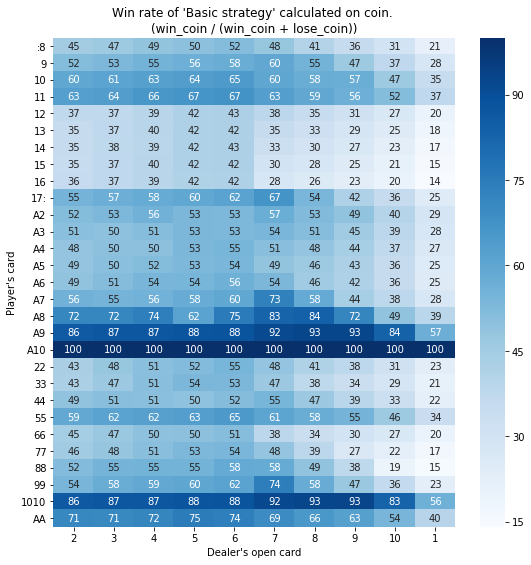

Wall time: 59.8 s


In [9]:
%%time #最適化したベーシックストラテジーによるシミュレーション結果．
c = abj.WinPercentage(df)
bs_new = c.basic_strategy_win_percentage()

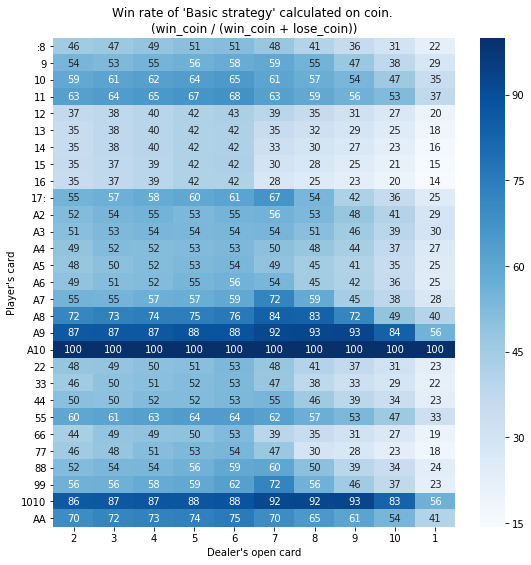

Wall time: 42 s


In [16]:
%%time #一般的なベーシックストラテジーによるシミュレーション結果．
d = abj.WinPercentage(df2)
bs_basic = d.basic_strategy_win_percentage()

## 異なる部分における勝率の違いを確認
## →どちらのベーシックストラテジーの方が合理的かを見分ける．

In [26]:
bs_new[new_bs != bs].fillna("-")

first_DC,2,3,4,5,6,7,8,9,10,1
first_PC,,,,,,,,,,
:8,-,-,-,-,-,-,-,-,-,21.42
9,51.8,-,-,-,-,-,-,-,-,28.27
10,-,-,-,-,-,-,-,-,-,34.78
11,-,-,-,-,-,-,-,-,-,37.33
12,-,37.26,-,-,-,-,-,-,-,19.56
13,-,-,-,-,-,-,-,-,-,18.23
14,-,-,-,-,-,-,-,-,-,16.69
15,-,-,-,-,-,-,-,-,-,15.29
16,-,-,-,-,-,-,-,-,-,14.13


In [25]:
bs_basic[new_bs != bs].fillna("-")

first_DC,2,3,4,5,6,7,8,9,10,1
first_PC,,,,,,,,,,
:8,-,-,-,-,-,-,-,-,-,22.11
9,54.44,-,-,-,-,-,-,-,-,28.72
10,-,-,-,-,-,-,-,-,-,34.65
11,-,-,-,-,-,-,-,-,-,37.26
12,-,37.93,-,-,-,-,-,-,-,19.55
13,-,-,-,-,-,-,-,-,-,18.19
14,-,-,-,-,-,-,-,-,-,16.49
15,-,-,-,-,-,-,-,-,-,15.2
16,-,-,-,-,-,-,-,-,-,14.36


In [24]:
bb = bs_new - bs_basic
bb[new_bs != bs].fillna("-")

first_DC,2,3,4,5,6,7,8,9,10,1
first_PC,,,,,,,,,,
:8,-,-,-,-,-,-,-,-,-,-0.69
9,-2.64,-,-,-,-,-,-,-,-,-0.45
10,-,-,-,-,-,-,-,-,-,0.13
11,-,-,-,-,-,-,-,-,-,0.07
12,-,-0.67,-,-,-,-,-,-,-,0.01
13,-,-,-,-,-,-,-,-,-,0.04
14,-,-,-,-,-,-,-,-,-,0.2
15,-,-,-,-,-,-,-,-,-,0.09
16,-,-,-,-,-,-,-,-,-,-0.23


## 考察
### ・DCが"1"のときは勝率のさは比較的少ないため，どちらのアクションであっても問題はないといえる．
### ・PC="88", DC="10"のときは15.16%も一般的なベーシックストラテジーの方が勝率が高いため，Pを選択するべき．おそらく一般的なベーシックストラテジーの方が勝率が高かった原因はこの要素にあると考えられる．




# MakeDataFrameCardCustomized
### 上クラスで作成したデータフレームを元に，最適化されたベーシックストラテジーの各要素の勝率をより詳細に分析する．

100%|████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [16:30<00:00, 10.10it/s]


DataFrameを作成


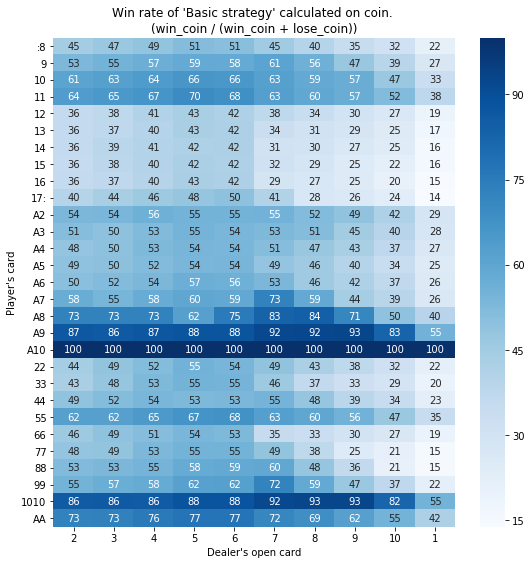

Wall time: 17min


In [40]:
%%time
e = md.MakeDataFrameCardCustomized(10000, 6, False, basic_strategy_num="_new") # 最適化されたベーシックストラテジーでシミュレーション
df3 = e.main()
f = abj.WinPercentage(df3)
bsp_new = f.basic_strategy_win_percentage()

100%|████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [08:11<00:00, 20.35it/s]


DataFrameを作成


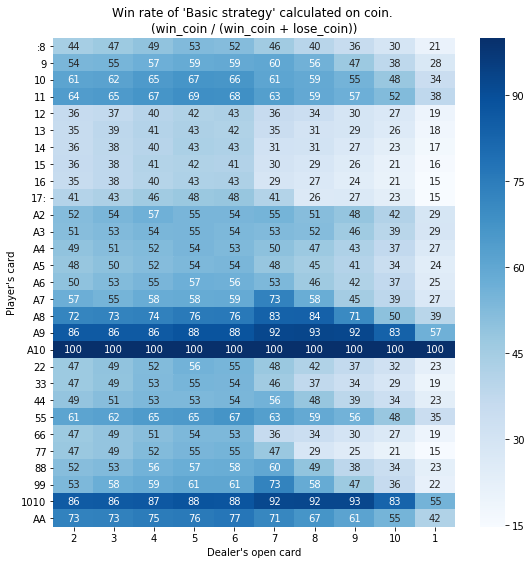

Wall time: 8min 24s


In [41]:
%%time
e = md.MakeDataFrameCardCustomized(10000, 6, False, basic_strategy_num="") # 一般的なベーシックストラテジーでシミュレーション
df4 = e.main()
g = abj.WinPercentage(df4)
bsp_basic = g.basic_strategy_win_percentage()

In [42]:
bb2 = bsp_new - bsp_basic
bb2[new_bs != bs].fillna("-")

first_DC,2,3,4,5,6,7,8,9,10,1
first_PC,,,,,,,,,,
:8,-,-,-,-,-,-,-,-,-,1.01
9,-1.17,-,-,-,-,-,-,-,-,-0.25
10,-,-,-,-,-,-,-,-,-,-1.32
11,-,-,-,-,-,-,-,-,-,0.23
12,-,0.99,-,-,-,-,-,-,-,-0.16
13,-,-,-,-,-,-,-,-,-,-1
14,-,-,-,-,-,-,-,-,-,-0.82
15,-,-,-,-,-,-,-,-,-,-0.09
16,-,-,-,-,-,-,-,-,-,-0.13
